In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE = 512
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 30

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Data",
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 7023 files belonging to 4 classes.


2022-05-16 18:07:46.331400: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
class_names = dataset.class_names
class_names

['glioma', 'meningioma', 'notumor', 'pituitary']

In [5]:
len(dataset)

220

(512, 512, 3)
(32, 512, 512, 3)
[3 2 2 3 0 3 3 3 3 3 1 0 3 3 2 0 2 3 0 1 2 2 2 3 1 1 0 0 1 3 2 0]


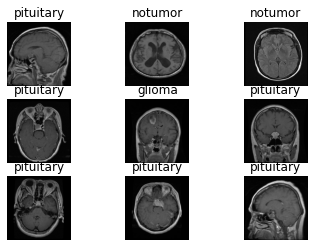

In [6]:
for images_batch, label_batch in dataset.take(1):
    print(images_batch[0].shape)
    print(images_batch.shape)
    print(label_batch.numpy())
    
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        plt.imshow(images_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True,
                              shuffle_size = 10):
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size)
    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [9]:
#train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
#test_ds = test_ds .cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [10]:
reszie_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255),
])

In [11]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

In [12]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 4


model = models.Sequential([
    reszie_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, input_shape)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)

In [13]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 512, 512, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 512, 512, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 510, 510, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 255, 255, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 253, 253, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 126, 126, 64)       0         
 2D)                                                  

In [14]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/30
176/176 [==============================] - 3004s 17s/step - loss: 0.9747 - accuracy: 0.5993 - val_loss: 0.8462 - val_accuracy: 0.6719
Epoch 2/30
176/176 [==============================] - 1898s 11s/step - loss: 0.6507 - accuracy: 0.7479 - val_loss: 0.5020 - val_accuracy: 0.7997
Epoch 3/30
176/176 [==============================] - 4946s 28s/step - loss: 0.5543 - accuracy: 0.7889 - val_loss: 0.4289 - val_accuracy: 0.8324
Epoch 4/30
176/176 [==============================] - 1492s 8s/step - loss: 0.4711 - accuracy: 0.8255 - val_loss: 0.4135 - val_accuracy: 0.8466
Epoch 5/30
176/176 [==============================] - 1796s 10s/step - loss: 0.4153 - accuracy: 0.8411 - val_loss: 0.3695 - val_accuracy: 0.8523
Epoch 6/30
176/176 [==============================] - 1778s 10s/step - loss: 0.3861 - accuracy: 0.8491 - val_loss: 0.3572 - val_accuracy: 0.8565
Epoch 7/30
176/176 [==============================] - 1805s 10s/step - loss: 0.3550 - accuracy: 0.8613 - val_loss: 0.2826 - val_acc